# Análisis de Consumo Energético y Clustering con K-Means

## Objetivos del Cuaderno


1. **Validación del Modelo**: Evaluar la calidad de los clusters generados utilizando metodos y visualizaciones adecuadas.
    -  **Visualización de Clusters**: Graficar los clusters generados para observar la distribución de los datos y la separación entre los grupos
        - **Análisis de Componentes Principales (PCA)**: Para la visualizazacion 2D de los cluster

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pickle
import seaborn as sns
from sklearn.decomposition import PCA
import warnings

warnings.filterwarnings("ignore")

#### Cargar los datasets

In [2]:
df = pd.read_csv("dataset/features_StandardScaler.csv", index_col='cups')
df_features_final = pd.read_csv("dataset/features_KNNImputer.csv", index_col='cups')
X = df.values

### Elegir con que modelos has entrenado, en futuras versones seran varaibles de entorno

In [3]:
which_model = "bkmeans" #Choose beetween "bkmeans" or "kmeans" or "spectral_clustering"

In [4]:
if which_model == "bkmeans":
    with open("pkls/bkmeans_model.pkl", "rb") as f:
            model_final = pickle.load(f)

    if hasattr(model_final, 'labels_'):
        labels = model_final.labels_

    if hasattr(model_final, 'cluster_centers_'):
        centroids = model_final.cluster_centers_
elif which_model == "kmeans":
    with open("pkls/kmeans_model.pkl", "rb") as f:
        model_final = pickle.load(f)

    if hasattr(model_final, 'labels_'):
        labels = model_final.labels_

    if hasattr(model_final, 'cluster_centers_'):
        centroids = model_final.cluster_centers_
else:
    raise ValueError("Invalid model choice. Choose 'bkmeans', 'kmeans'")


In [5]:
best_k = model_final.n_clusters
print(f"Best k: {best_k}")

Best k: 6


### Variables más influyentes según varianza entre clusters

In [6]:
centroides = pd.DataFrame(
    model_final.cluster_centers_,
    columns=df_features_final.columns
)

variabilidad = centroides.var(axis=0).sort_values(ascending=False)
print(variabilidad)

p75_otoño                         1.621369
media_otoño                       1.578290
p75_primavera                     1.574289
media_anual                       1.558253
p75_anual                         1.556613
media_invierno                    1.527239
media_primavera                   1.508512
mediana_invierno                  1.478273
energia_fft_otoño                 1.416823
energia_fft_anual                 1.415548
mediana_otoño                     1.399694
mediana_anual                     1.368510
energia_fft_primavera             1.341485
p75_invierno                      1.320831
mediana_primavera                 1.296091
energia_fft_invierno              1.221923
std_anual                         1.195473
std_otoño                         1.185186
std_primavera                     1.179244
media_verano                      1.138542
energia_fft_verano                1.113269
p75_verano                        1.109469
std_invierno                      1.066698
p25_inviern

## Visualización de Resultados de Clustering

In [7]:
cluster_colors = cm.get_cmap('tab10', best_k)

#### Visualización de los Centros de los Clusters

Graficamos los valores de los centros de cada cluster en todas las columnas (features) del dataset

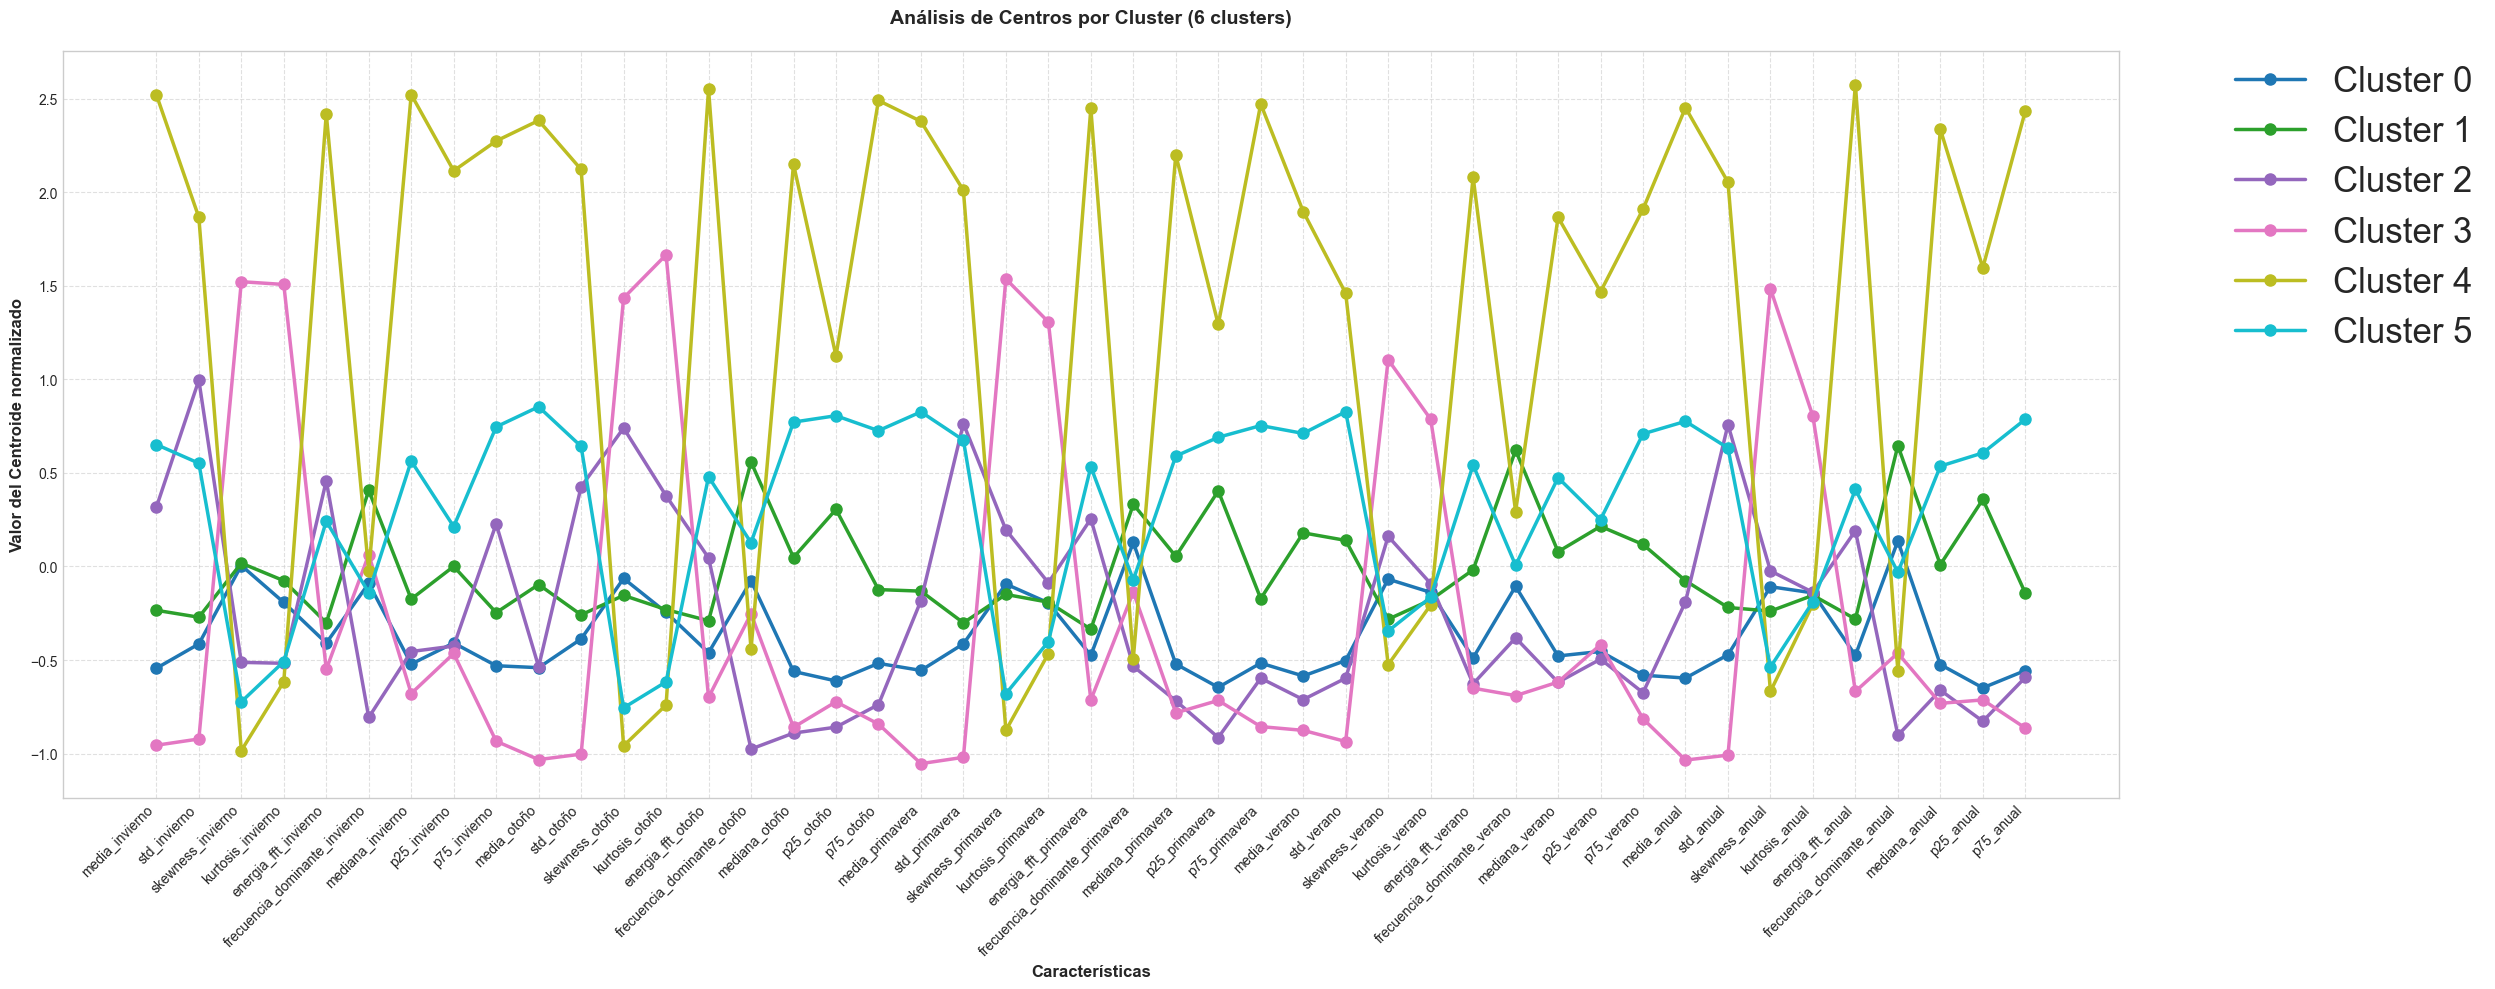

In [8]:
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.facecolor'] = 'white'
feature_names = df_features_final.columns
plt.figure(figsize=(25, 10))

for i in range(best_k):
    plt.plot(model_final.cluster_centers_[i], 
             label=f'Cluster {i}',
             marker='o',
             markersize=8,
             linewidth=2.5,
             color=cluster_colors(i))

plt.xticks(np.arange(len(feature_names)), 
           feature_names, 
           rotation=45, 
           ha='right',
           fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Características', fontsize=12, fontweight='bold')
plt.ylabel('Valor del Centroide normalizado', fontsize=12, fontweight='bold')
plt.title(f'Análisis de Centros por Cluster ({best_k} clusters)', 
          fontsize=14, 
          fontweight='bold', 
          pad=20)
plt.legend(bbox_to_anchor=(1.05, 1), 
           loc='upper left', 
           borderaxespad=0.,
           fontsize=25)

plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### Visualización de Clusters PCA

#### 1. PCA 2D

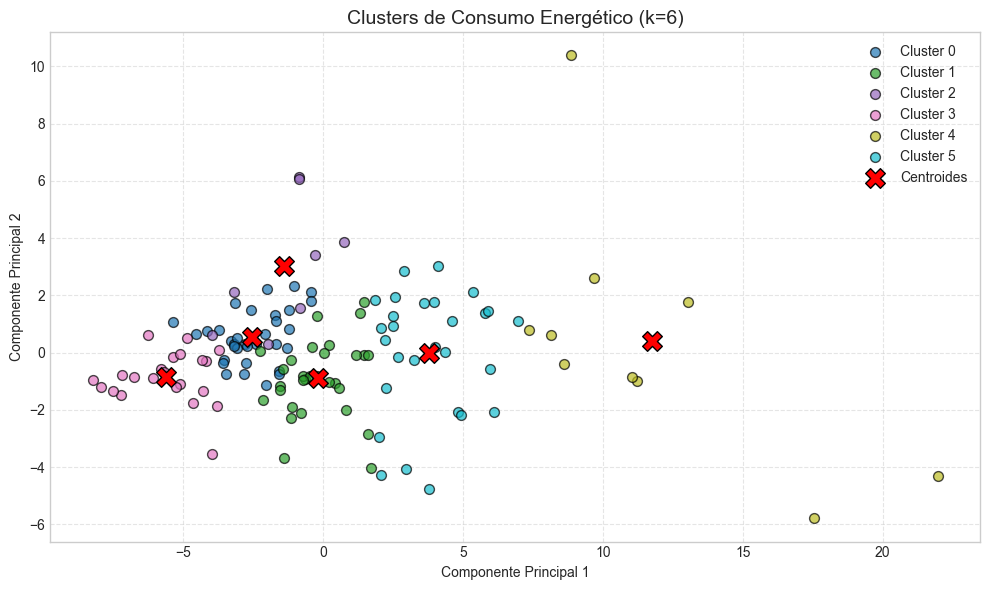

In [9]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
centroids_pca = pca.transform(centroids)

plt.figure(figsize=(10, 6))
for cluster in range(best_k):
    plt.scatter(
        X_pca[labels == cluster, 0],
        X_pca[labels == cluster, 1],
        label=f'Cluster {cluster}',
        color=cluster_colors(cluster),
        alpha=0.7,
        edgecolor='k',
        s=50
    )

# Centroides
plt.scatter(
    centroids_pca[:, 0],
    centroids_pca[:, 1],
    marker='X',
    s=200,
    c='red',
    edgecolor='k',
    label='Centroides'
)

plt.title(f'Clusters de Consumo Energético (k={best_k})', fontsize=14)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

#### 2. PCA 3D

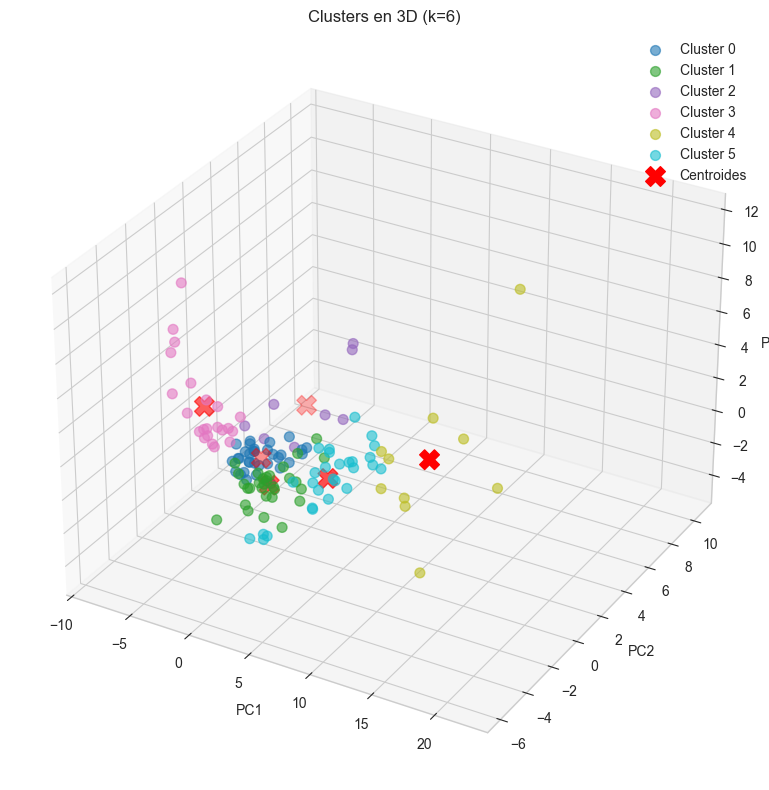

In [10]:
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X)
centroids_pca_3d = pca_3d.transform(centroids)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

for cluster in range(best_k):
    ax.scatter(
        X_pca_3d[labels == cluster, 0],
        X_pca_3d[labels == cluster, 1],
        X_pca_3d[labels == cluster, 2],
        label=f'Cluster {cluster}',
        color=cluster_colors(cluster),
        alpha=0.6,
        s=50
    )

ax.scatter(
    centroids_pca_3d[:, 0],
    centroids_pca_3d[:, 1],
    centroids_pca_3d[:, 2],
    marker='X',
    s=200,
    c='red',
    label='Centroides'
)

ax.set_title(f'Clusters en 3D (k={best_k})')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.legend()
plt.tight_layout()
plt.show()

### Guardar cups y cluster asociacion

In [11]:
df_clusters = pd.DataFrame({
    'CUPS': df_features_final.index,
    'CLUSTER': labels
})
df_clusters.to_csv('dataset/cluster_cups.csv', index=False)



### Visualización de Clusters de su Consumo Original

In [12]:
df_original = pd.read_csv("../data/vertical_preprocessed_data_2.csv", sep=";")

cups_con_nan_invierno = ['ceaddbf817fc', 'd0fbcc1108d8']
df_original = df_original[~df_original['cups'].isin(cups_con_nan_invierno)]

cups_con_nan_otoño = ['83c7fbada9b4', 'b476034a2e3d', 'ba38270a360e']
df_original = df_original[~df_original['cups'].isin(cups_con_nan_otoño)]


df_clusters = df_features_final.reset_index()[['cups']].copy()
df_clusters['cluster'] = labels


df_final = pd.merge(df_original, df_clusters[['cups', 'cluster']], on='cups', how='left')

# Reordenar las columnas para que 'cluster' sea la segunda
column_order = ['cups', 'cluster'] + [col for col in df_final.columns if col not in ['cups', 'cluster']]
df_final = df_final[column_order]

df_final.to_csv('dataset/datos_consumo_con_clusters.csv', index=False, sep=';')

### 1. Distribución de Series por Cluster

cluster
0    33
1    30
2     8
3    22
4    10
5    28
Name: count, dtype: int64


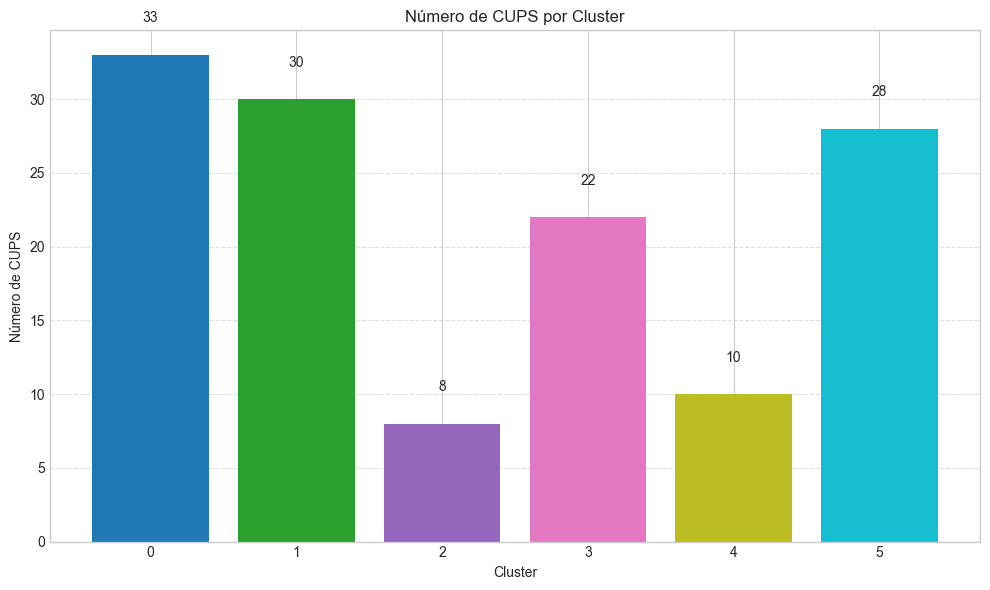

In [13]:
cluster_counts = df_clusters['cluster'].value_counts().sort_index()
print(df_clusters['cluster'].value_counts().sort_index())

plt.figure(figsize=(10, 6))
bars = plt.bar(
    cluster_counts.index.astype(int),
    cluster_counts.values,
    color=[cluster_colors(int(i)) for i in cluster_counts.index]
)

plt.title('Número de CUPS por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Número de CUPS')
plt.xticks(cluster_counts.index.astype(int))
plt.grid(axis='y', linestyle='--', alpha=0.6)

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height + 2,
        str(int(height)),
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.tight_layout()
plt.show()

### 2. Superposición de Series con Centroides

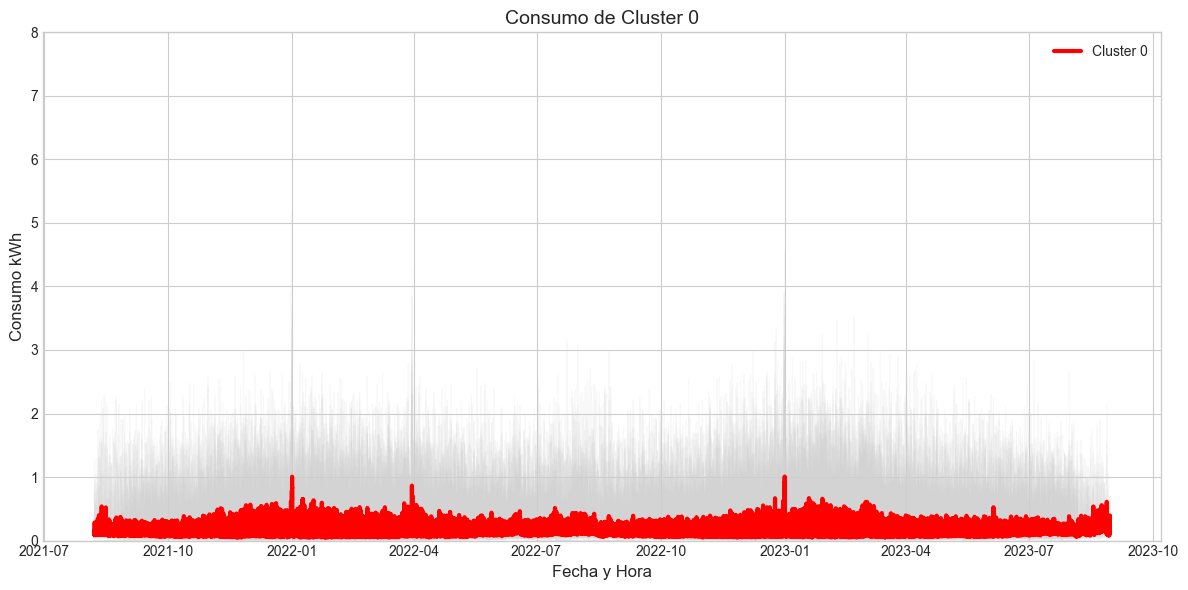

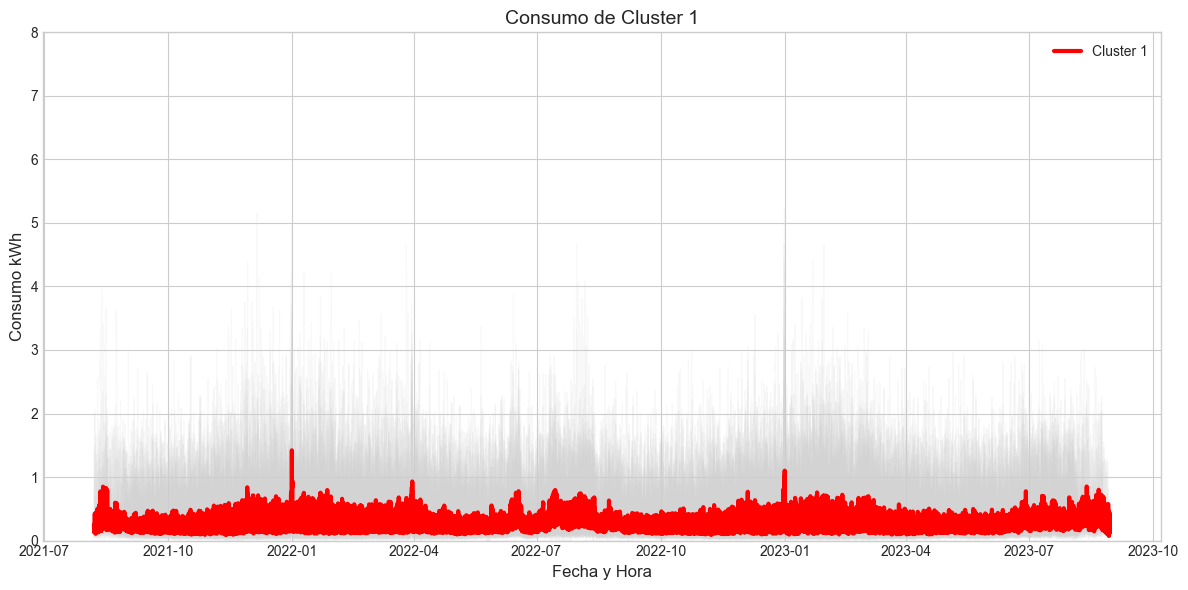

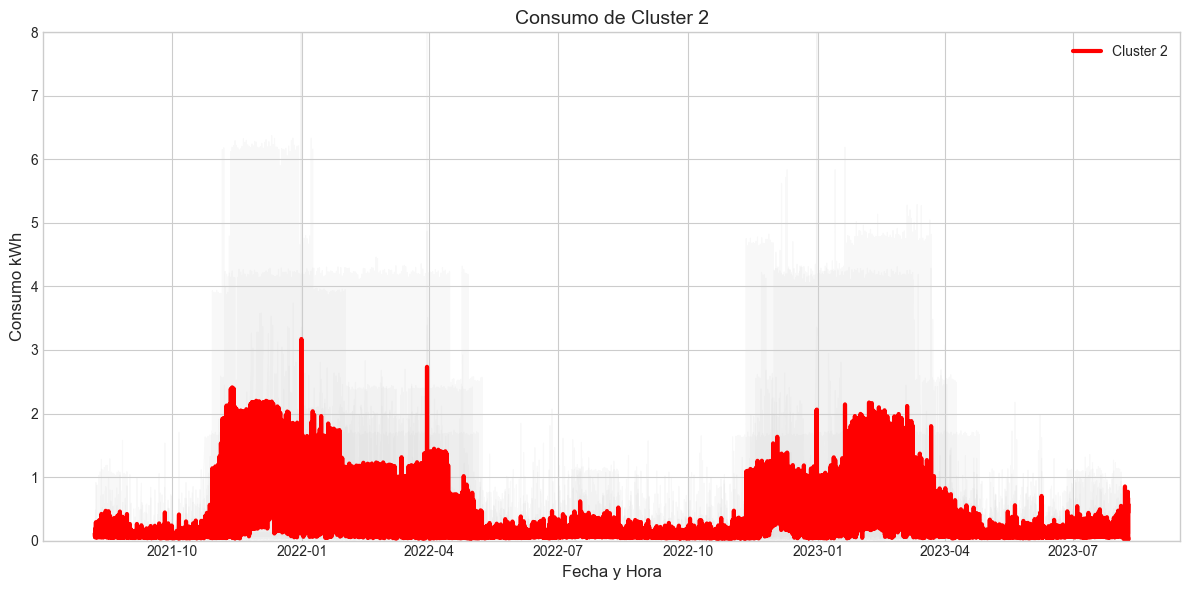

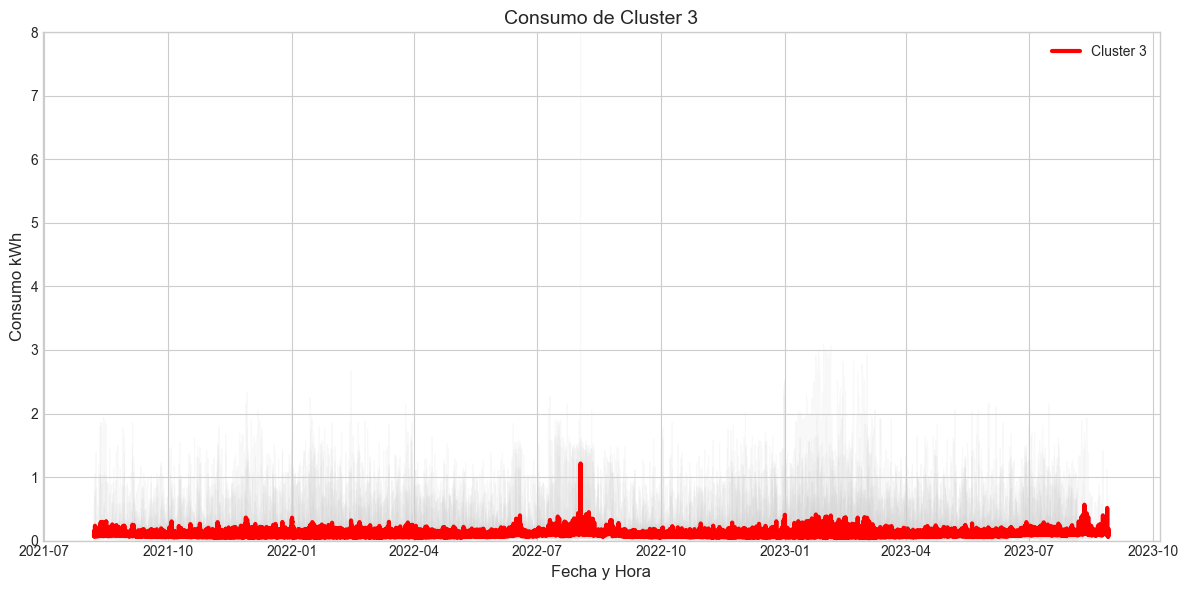

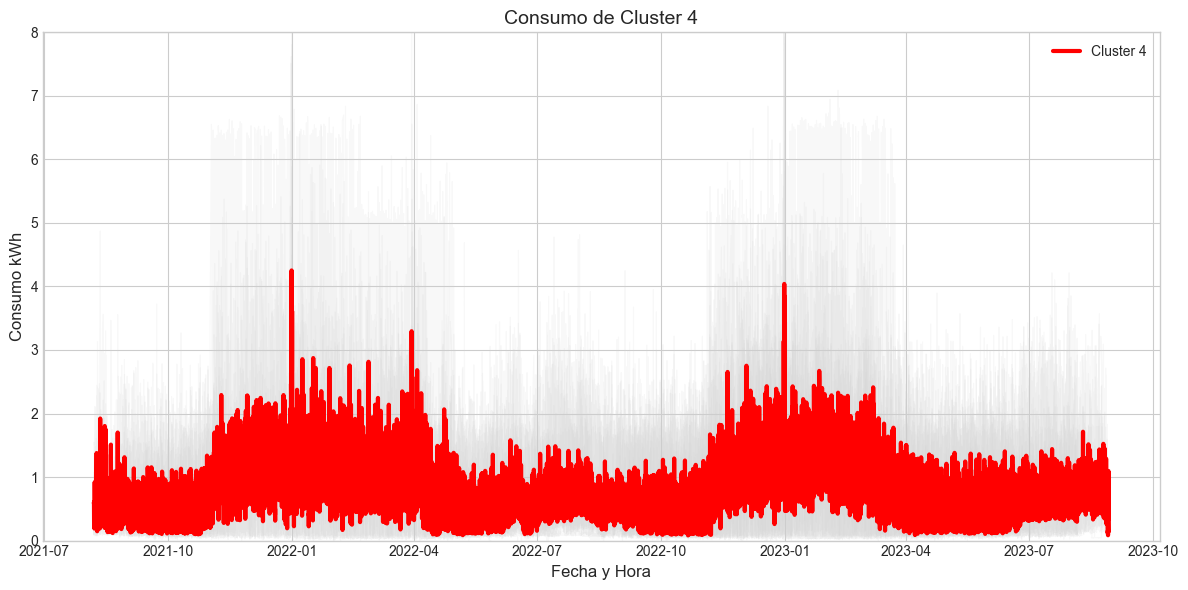

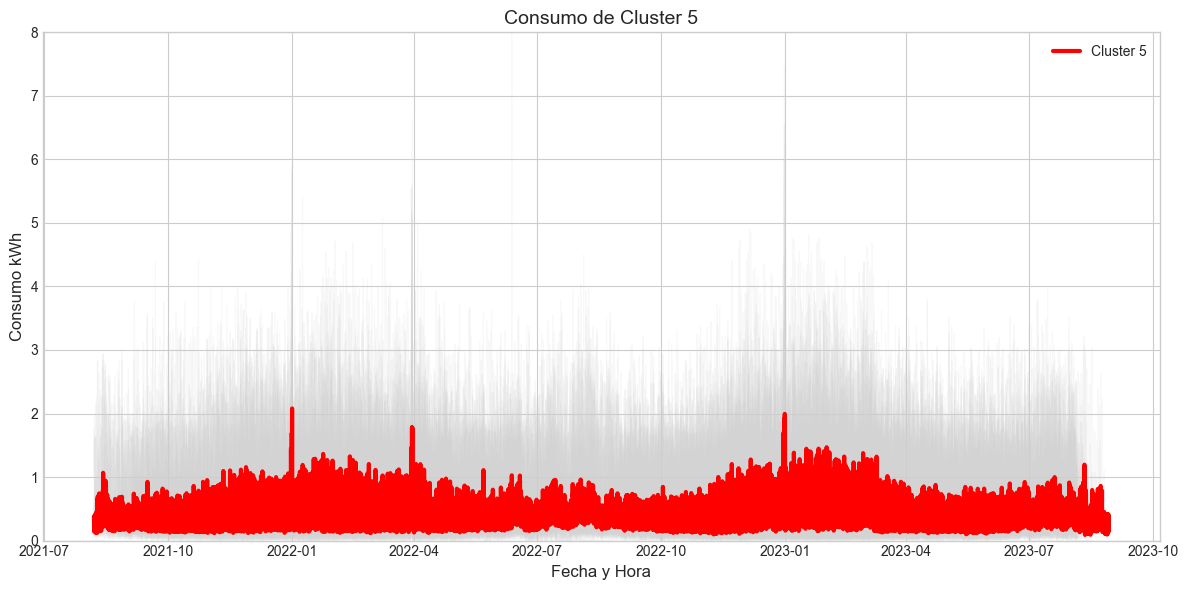

In [14]:
df = pd.read_csv("dataset/datos_consumo_con_clusters.csv", sep=';')

df['hora'] = df['hora'].astype(int)

df['datetime'] = pd.to_datetime(df['fecha']) + pd.to_timedelta(df['hora'], unit='h')

clusters = sorted(df['cluster'].unique())

for cluster in clusters:
    plt.figure(figsize=(12, 6))

    cluster_data = df[df['cluster'] == cluster]
    
    for cups_id in cluster_data['cups'].unique():
        cups_series = cluster_data[cluster_data['cups'] == cups_id]
        plt.plot(cups_series['datetime'], cups_series['consumo_kWh'], color='lightgray', alpha=0.15, linewidth=0.8)
    
    cluster_center = cluster_data.groupby('datetime')['consumo_kWh'].mean()
    plt.plot(cluster_center.index, cluster_center.values, label=f'Cluster {int(cluster)}', linewidth=3, color='red')

    plt.title(f'Consumo de Cluster {int(cluster)}', fontsize=14)
    plt.xlabel('Fecha y Hora', fontsize=12)
    plt.ylabel('Consumo kWh', fontsize=12)
    plt.grid(True)
    plt.legend()
    
    # Fijar el rango del eje Y de 0 a 8 kWh
    plt.ylim(0, 8)
    
    plt.tight_layout()
    plt.show()
